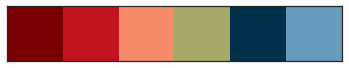

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import glob

sns.set(style="white", font_scale=2.0)
palette = ["#780000", "#C1121F", "#F78C6B", "#A6A867", "#003049", "#669BBC"]
sns.palplot(palette)
sns.set_palette(palette)

In [100]:
het_results = torch.load("hetacquisitions_highnoise.pt")
hetucb_trials = het_results["hetucb"]
hetei_trials = het_results["hetei"]

In [101]:
cei_results = []
for f in glob.glob("cei_seed_*.pt"):
    res = torch.load(f)
    cei_results.append([res["x"], res["y"]])

In [102]:
cucb_results = []
for f in glob.glob("cucb_seed_*.pt"):
    res = torch.load(f)
    cucb_results.append([res["x"], res["y"]])

In [103]:
hetucb_y = torch.stack([x[1] for x in hetucb_trials])
hetei_y = torch.stack([x[1] for x in hetei_trials])

cucb_y = torch.stack([x[1].cpu() for x in cucb_results])
cei_y = torch.stack([x[1].cpu() for x in cei_results])

In [104]:
from scipy.stats import binom

def prep_mean_and_bands(tsr, slice_ind=0):
    cummaxes = tsr.cummax(1)[0]
    
    ntrials = cummaxes.shape[0]
    l = torch.arange(ntrials)[binom.cdf(torch.arange(ntrials), ntrials, 0.5) < 0.025][-1]
    u = torch.arange(ntrials)[binom.cdf(torch.arange(ntrials), ntrials, 0.5) > 0.975][0]
    sorted_cvals = cummaxes.sort(0)[0][[l.item(), u.item()]]
    medians = cummaxes.median(0)[0]
    # print(medians.shape, sorted_cvals.shape)
    return medians, sorted_cvals[0].view(-1), sorted_cvals[1].view(-1)

In [108]:
hetucb_y.shape

torch.Size([16, 30, 1])

In [110]:
cucb_y = cucb_y[:, :87]
cei_y = cei_y[:, :87]

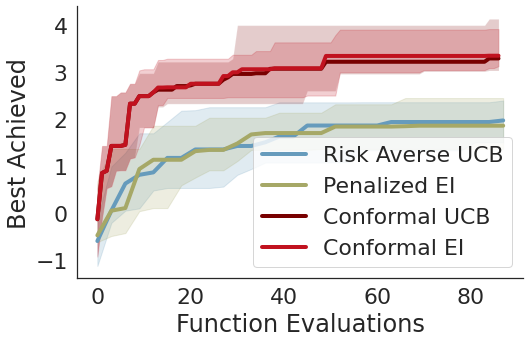

In [119]:
fig, ax = plt.subplots(1, 1, figsize = (8, 5))
plt.plot(torch.arange(0, 30 * 3, 3), prep_mean_and_bands(hetucb_y)[0], linewidth = 4,
        label = "Risk Averse UCB", color = palette[-1])
plt.fill_between(torch.arange(0, 30 * 3, 3), 
                 *(prep_mean_and_bands(hetucb_y)[1:]),
                alpha = 0.2, color = palette[-1]
                )
plt.plot(torch.arange(0, 30 * 3, 3), prep_mean_and_bands(hetei_y)[0], linewidth = 4,
        label = "Penalized EI", color = palette[3])
plt.fill_between(torch.arange(0, 30 * 3, 3), 
                 *(prep_mean_and_bands(hetei_y)[1:]),
                alpha = 0.2, color = palette[3]
                )

plt.plot(torch.arange(0, 87, 1), prep_mean_and_bands(cucb_y)[0], linewidth = 4,
        label = "Conformal UCB")
plt.fill_between(torch.arange(0, 87, 1), 
                 *(prep_mean_and_bands(cucb_y)[1:]),
                alpha = 0.2,
                )
plt.plot(torch.arange(0, 87, 1), prep_mean_and_bands(cei_y)[0], linewidth = 4,
        label = "Conformal EI", color = palette[1])
plt.fill_between(torch.arange(0, 87, 1), 
                 *(prep_mean_and_bands(cei_y)[1:]),
                alpha = 0.2, color = palette[1]
                )
sns.despine()
plt.legend()
plt.xlabel("Function Evaluations")
plt.ylabel("Best Achieved")
plt.savefig("hetbo1d_long.pdf", bbox_inches = "tight")

In [85]:
bounds = torch.tensor([-10, 10.])
fn = lambda x: (10. * torch.sin(x)+1) * (torch.sin(3. * x) / x).nan_to_num(1.) #+ torch.cos(3. * x)
noise = lambda x: 2.0 * torch.sigmoid(0.5 * x)

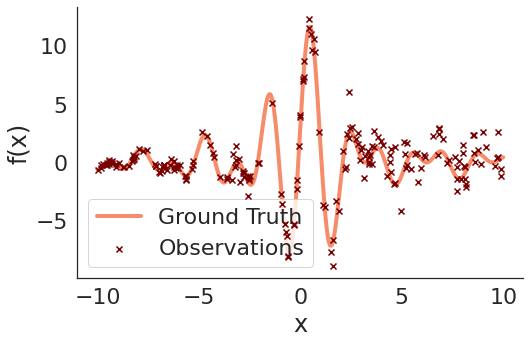

In [118]:
fig, ax = plt.subplots(figsize = (8, 5))

xx = torch.linspace(-10., 10., 1000)
plt.plot(xx, fn(xx), linewidth=4, label = "Ground Truth", color = palette[2])
xx = torch.rand(200) * 20 - 10.
plt.scatter(xx, fn(xx) + noise(xx).sqrt() * torch.randn_like(xx), color = palette[0], marker = "x", zorder=10,
           label = "Observations")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc = "lower left")
sns.despine()
plt.savefig("hetbo1d_function.pdf", bbox_inches = "tight")

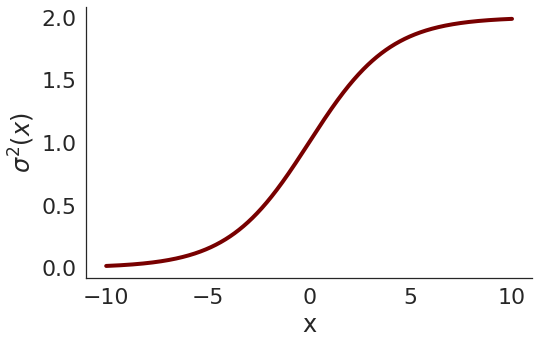

In [117]:
fig, ax = plt.subplots(figsize = (8, 5))

xx = torch.linspace(-10., 10., 1000)
plt.plot(xx, noise(xx), linewidth=4, label = "Ground Truth")
plt.xlabel("x")
plt.ylabel(r"$\sigma^2(x)$")
sns.despine()
plt.savefig("hetbo1d_noise.pdf", bbox_inches = "tight")

In [79]:
prep_mean_and_bands(hetei_y)

tensor(3) tensor(12)
torch.Size([30, 1]) torch.Size([2, 30, 1])


(tensor([[-0.4601],
         [ 0.0647],
         [ 0.1201],
         [ 0.9505],
         [ 1.1481],
         [ 1.1481],
         [ 1.1481],
         [ 1.3312],
         [ 1.3578],
         [ 1.3578],
         [ 1.4935],
         [ 1.6866],
         [ 1.7161],
         [ 1.7161],
         [ 1.7161],
         [ 1.7161],
         [ 1.7161],
         [ 1.8543],
         [ 1.8543],
         [ 1.8543],
         [ 1.8543],
         [ 1.8543],
         [ 1.8618],
         [ 1.8727],
         [ 1.8727],
         [ 1.8727],
         [ 1.8727],
         [ 1.8727],
         [ 1.8727],
         [ 1.8727]]),
 tensor([-0.6048, -0.4740, -0.4111,  0.0548,  0.1201,  0.1201,  0.6057,  0.7692,
          0.9238,  0.9238,  1.1204,  1.3578,  1.3578,  1.3578,  1.3578,  1.3578,
          1.3783,  1.3783,  1.3783,  1.3783,  1.3783,  1.3783,  1.3783,  1.3783,
          1.3783,  1.3783,  1.3783,  1.3783,  1.3783,  1.3783]),
 tensor([0.6867, 1.3783, 1.3783, 1.3783, 1.8712, 1.8712, 1.8712, 1.8712, 2.0412,
         